Name: Sakshi Mahendra Naik, Roll No: 15

Practical 9: Image Segmentation using Thresholding

In [ ]:
## Name: Image Segmentation using Thresholding ##
import cv2
import numpy as np 
import sys
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline
from io import BytesIO
from PIL import Image
from google.colab import files
from skimage import color
from skimage import io
from PIL import ImageDraw
from PIL import ImageFont
from skimage.util import random_noise
figsize = (6,6)

In [ ]:
uploaded = files.upload()

Saving Cat.bmp to Cat.bmp


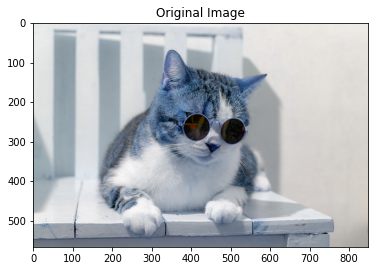

In [ ]:
## Reading Image ##
im=cv2.imread("Cat.bmp")
plt.figure(figsize=figsize)
plt.imshow(im,cmap='gray',vmin=0,vmax=256)
plt.title('Original Image')
plt.show()

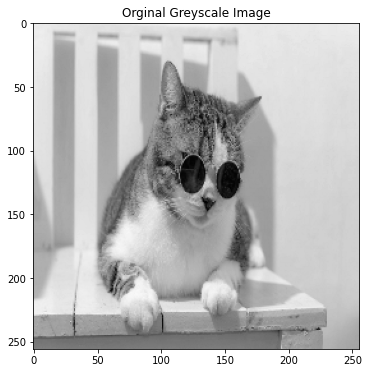

In [ ]:
## Greyscale Image ##
im2=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
img=cv2.resize(im2,(256,256))
plt.figure(figsize = figsize)
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.title("Orginal Greyscale Image")
plt.show()

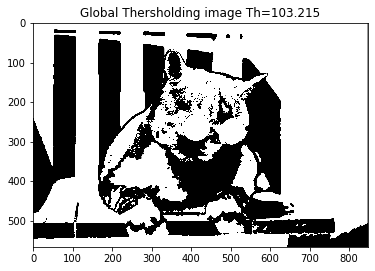

In [ ]:
## Global Thresholding ##
im3=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
m=im2.shape[0]
n=im2.shape[1]
total=0
for i in range (0,m):
  for j in range (0,n):
    total = total+ im2[i,j]
mean = total/(m*n)
# mean
bin_img=im2
for i in range(0,m):
  for j in range(0,n):
    if im3[i,j]>=mean:
      bin_img[i,j]=1
  else:
      bin_img[i,j]=0
bin_img=bin_img.astype(np.int8)
plt.figure(figsize=figsize)
plt.imshow(bin_img,cmap="gray",vmin=0, vmax=1)
plt.title("Global Thersholding image Th=103.215")
plt.show()

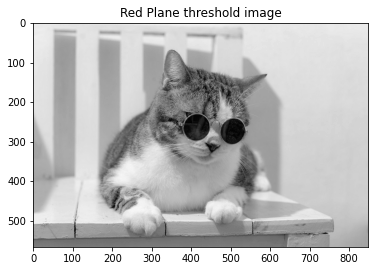

567
848


In [ ]:
## Red Plane Thresholding
im2=cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
r=m/2
c=n/2
plt.figure(figsize=figsize)
plt.imshow(im2, cmap="gray",vmin=0, vmax=256)
plt.title("Red Plane threshold image")
plt.show()
print(m)
print(n)

In [ ]:
## Thresholding Function ##
def thre(im2):
  m=im2.shape[0]
  n=im2.shape[1]
  im3=np.float32(im2)
  total=0
  for i in range (0,m):
    for j in range (0,n):
      total += im3[i,j]
  mean = total / (m*n)
  bin_img=im2
  for i in range(0,m):
    for j in range(0,n):
      if im3[i,j]>=mean:
        bin_img[i,j]=1
      else:
        bin_img[i,j]=0
        bin_img=bin_img.astype(np.int8)
        return bin_img,mean 

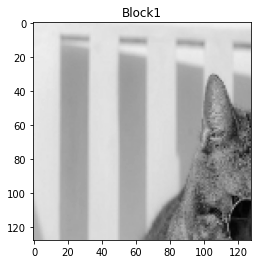

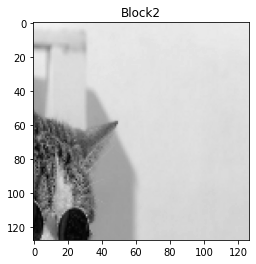

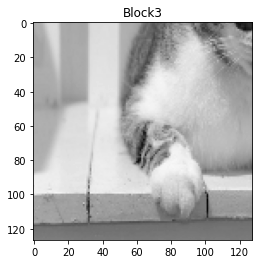

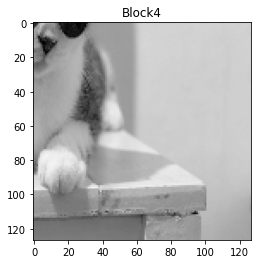

In [ ]:
## Formation of blocks of image

b1=img[0:128,0:128] #Block1
b2=img[0:128,129:256] #Block2
b3=img[129:256,0:128] #Block3
b4=img[129:256,129:256] #Block4
#Plotting Block 1
plt.imshow(b1, cmap="gray", vmin=0, vmax=256)
plt.title("Block1")
plt.show()
#Plotting Block 2
plt.imshow(b2, cmap="gray", vmin=0, vmax=256)
plt.title("Block2")
plt.show()
#Plotting Block 3
plt.imshow(b3, cmap="gray", vmin=0, vmax=256)
plt.title("Block3")
plt.show()
#Plotting Block 4
plt.imshow(b4, cmap="gray", vmin=0, vmax=256)
plt.title("Block4")
plt.show()


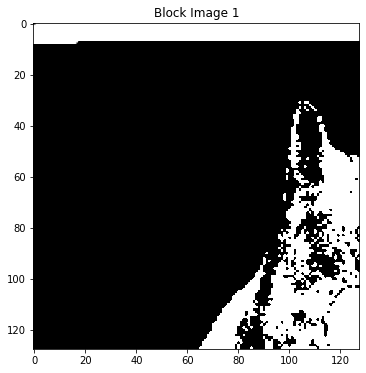

165.98291015625

In [ ]:
## Plotting of Threshold Block 1 ##

th_b1,mm=thre(b1)
plt.figure(figsize=figsize)
plt.imshow(th_b1, cmap="gray",vmin=0, vmax=1)
plt.title("Block Image 1")
plt.show()
mm

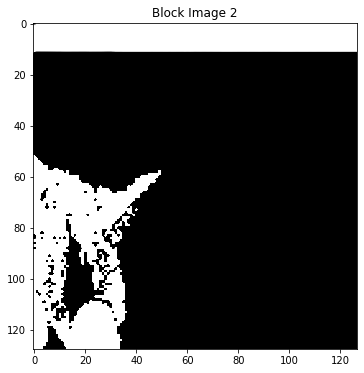

173.64954478346456

In [ ]:
## Plotting of Threshold Block 2 ##

th_b2,mm2=thre(b2)
plt.figure(figsize=figsize)
plt.imshow(th_b2, cmap="gray",vmin=0, vmax=1)
plt.title("Block Image 2")
plt.show()
mm2

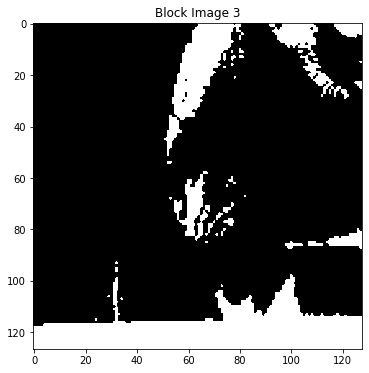

176.1232775590551

In [ ]:
## Plotting of Threshold Block 3 ##

th_b3,mm3=thre(b3)
plt.figure(figsize=figsize)
plt.imshow(th_b3, cmap="gray",vmin=0, vmax=1)
plt.title("Block Image 3")
plt.show()
mm3

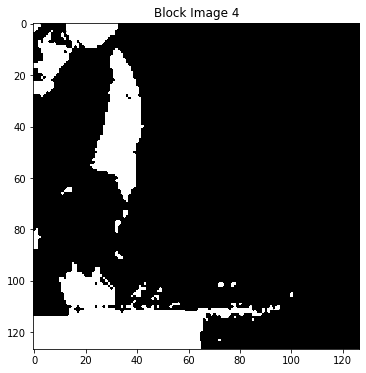

174.16473432946867

In [ ]:
## Plotting of Threshold Block 4 ##

th_b4,mm4=thre(b4)
plt.figure(figsize=figsize)
plt.imshow(th_b4, cmap="gray",vmin=0, vmax=1)
plt.title("Block Image 4")
plt.show()
mm4

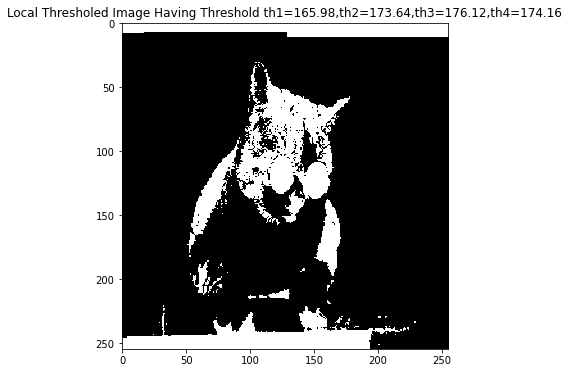

In [ ]:
## Concatenating the images ## 

# Horizontally Concatenate
finalr = cv2.hconcat([th_b1,th_b2])
finalv =cv2.hconcat([th_b3,th_b4])
# Vertically Concatenate 
final = cv2.vconcat([finalr,finalv])
plt.figure(figsize=figsize)
plt.imshow(final, cmap="gray", vmin=0, vmax=1)
plt.title("Local Thresholed Image Having Threshold th1=165.98,th2=173.64,th3=176.12,th4=174.16")
plt.show()

In [ ]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Practical-9.ipynb')